In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path

In [15]:
def dump_df(df):
    # Tem que usar essa opção pro pandas imprimir a saída toda, mas não queriamos definir isso pro arquivo inteiro
    with pd.option_context('display.max_rows', None, 'display.max_columns', None, "display.max_colwidth", None):
        print(df)

In [4]:
DATA_PATH = './data/glycemic_index/foods.csv'
df = pd.read_csv(DATA_PATH, delimiter=';').drop_duplicates().set_index('id')
df

,name,category,sample_amount,sample_unit,calories_kcal,calories_kj,protein,carbohydrates,fats,glycemic_index,glycemic_load
id,,,,,,,,,,,
baguette-white,Baguette (white),Baked products,100,grams,240.0,1004,7.5,49.0,2.5,95.0,46.5
baguette-whole-grain,Baguette (whole grain),Baked products,100,grams,219.0,916,6.3,38.8,1.2,73.0,28.3
bagel-wheat,Bagel (wheat),Baked products,100,grams,257.0,1075,10.0,50.5,1.6,70.0,35.4
biscuit,Biscuit,Baked products,100,grams,365.0,1527,6.2,48.5,16.5,70.0,34.0
biscotti-dry-cookies,Biscotti (dry cookies),Baked products,100,grams,358.0,1498,6.0,50.0,15.0,70.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...
tapioca-dried,Tapioca (dried),Other,100,grams,350.0,1464,0.2,87.8,0.0,85.0,74.6
taro,Taro,Other,100,grams,112.0,469,1.5,26.5,0.2,48.0,12.7
tahin,Tahin,Other,100,grams,595.0,2489,17.0,21.0,54.0,40.0,8.4


In [5]:
df.groupby('category').count()['name']

category
Baked products      49
Beverages           28
Dairy               44
Fast foods           9
Fruits              80
Grains             104
Greens              50
Meat                32
Mushrooms            2
Nuts                17
Oils and sauces     16
Other               16
Seafood              5
Soups                5
Spices              24
Sweets              42
Vegetables          55
Name: name, dtype: int64

In [23]:
# Criando as variáveis real_calories e carbs_kcal_perc

df['real_calories'] = df['carbohydrates'] * 4 + df['protein'] * 4 + df['fats'] * 9
df['carbs_kcal_perc'] = df['carbohydrates'] * 4 / df['real_calories']

# real_calories = 0, então carbs_kcal_perc ficou como NaN. Como é apenas um elemento, preferi corrigir manualmente.
df.loc['vinegar', 'carbs_kcal_perc'] = 0.0
df

,name,category,sample_amount,sample_unit,calories_kcal,calories_kj,protein,carbohydrates,fats,glycemic_index,glycemic_load,real_calories,carbs_kcal_perc
id,,,,,,,,,,,,,
baguette-white,Baguette (white),Baked products,100,grams,240.0,1004,7.5,49.0,2.5,95.0,46.5,248.5,0.788732
baguette-whole-grain,Baguette (whole grain),Baked products,100,grams,219.0,916,6.3,38.8,1.2,73.0,28.3,191.2,0.811715
bagel-wheat,Bagel (wheat),Baked products,100,grams,257.0,1075,10.0,50.5,1.6,70.0,35.4,256.4,0.787832
biscuit,Biscuit,Baked products,100,grams,365.0,1527,6.2,48.5,16.5,70.0,34.0,367.3,0.528179
biscotti-dry-cookies,Biscotti (dry cookies),Baked products,100,grams,358.0,1498,6.0,50.0,15.0,70.0,35.0,359.0,0.557103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
tapioca-dried,Tapioca (dried),Other,100,grams,350.0,1464,0.2,87.8,0.0,85.0,74.6,352.0,0.997727
taro,Taro,Other,100,grams,112.0,469,1.5,26.5,0.2,48.0,12.7,113.8,0.931459
tahin,Tahin,Other,100,grams,595.0,2489,17.0,21.0,54.0,40.0,8.4,638.0,0.131661


## Teste de hipótese
Categorias onde os alimentos são majoritariamente compostos de carboidratos e gorduras tendem a ter GL mais alto. Para testar a hipótese, podemos fazer um teste de permutação: embaralhamos as categorias dos alimentos, calculamos as médias e vemos se os valores que encontramos originalmente podem ser explicados pelo acaso ou se são de fato raros de se acontecer, implicando que nossa tese tem validade.

- Hipótese nula: (H0): As GLs médias das categorias que observamos pode ocorrer ao acaso
- Hipótese alternativa (HA): Alimentos com maior fração de carboidratos em sua composição têm maior GL, na média.

In [81]:
# Realizando testes de permutação
N = 10000
categorias = df.groupby('category').count().index
n_categorias = len(categorias)

df_permutacao = df[['category', 'glycemic_load']].copy()

medias = np.zeros((N, n_categorias))

for i in range(N):
    np.random.shuffle(df_permutacao['category'].values)
    medias[i] = (df_permutacao
        [['category', 'glycemic_load']]
        .groupby('category')
        .mean()
        ['glycemic_load']
    )

Baked products : IC (95%) = [10.3733, 20.3736] | t_obs = 32.0082


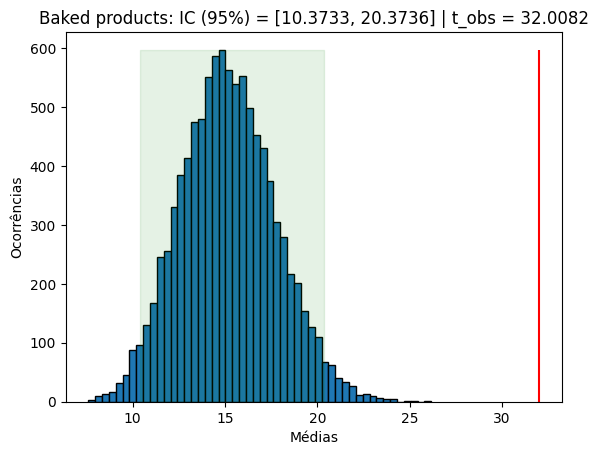

Beverages      : IC (95%) = [ 8.9393, 22.4787] | t_obs = 4.5250


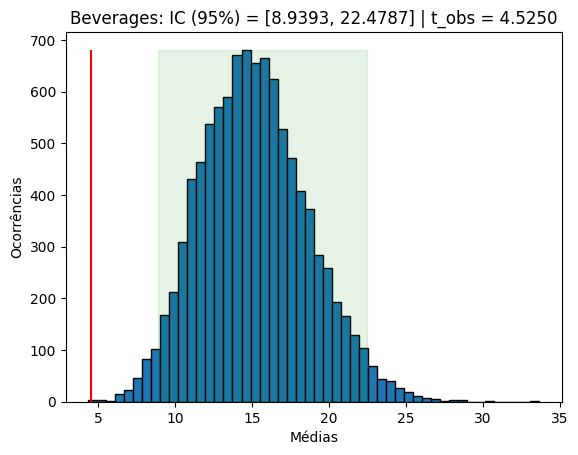

Dairy          : IC (95%) = [10.0409, 20.7671] | t_obs = 3.8273


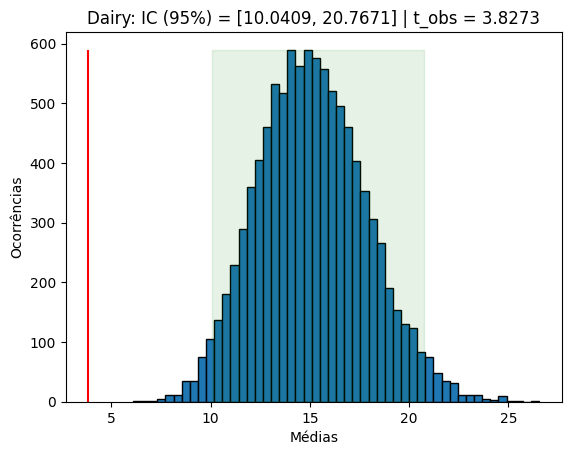

Fast foods     : IC (95%) = [ 4.9442, 28.8778] | t_obs = 30.5556


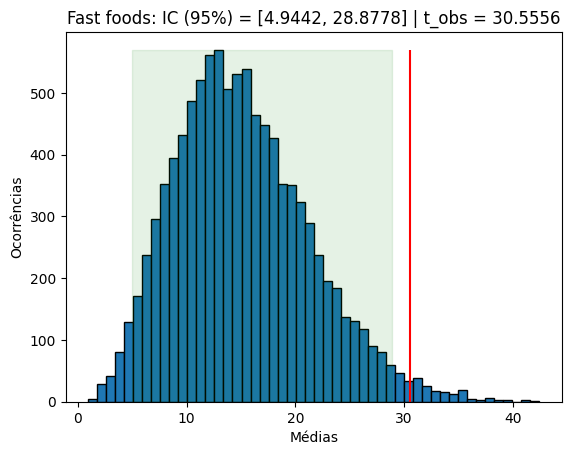

Fruits         : IC (95%) = [11.4450, 19.1544] | t_obs = 10.3750


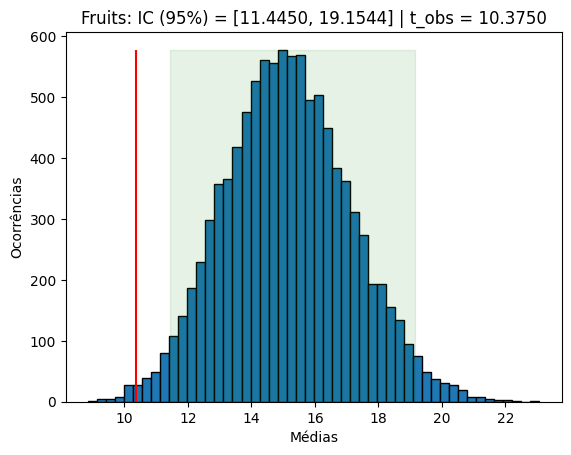

Grains         : IC (95%) = [11.9288, 18.4964] | t_obs = 28.6125


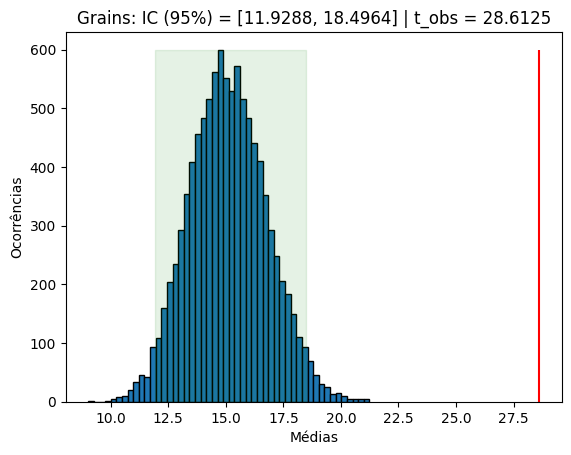

Greens         : IC (95%) = [10.3140, 20.3680] | t_obs = 7.3640


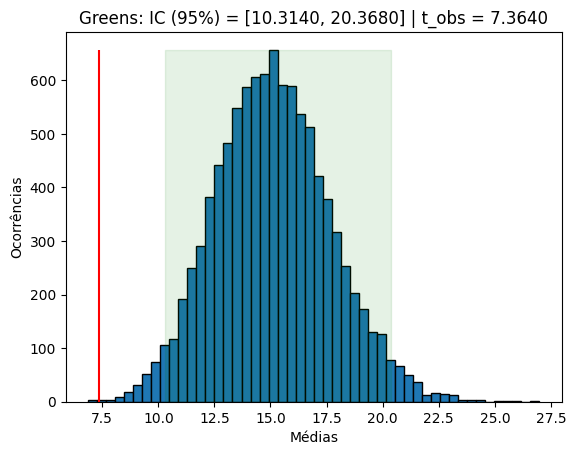

Meat           : IC (95%) = [ 9.2030, 21.8813] | t_obs = 0.8500


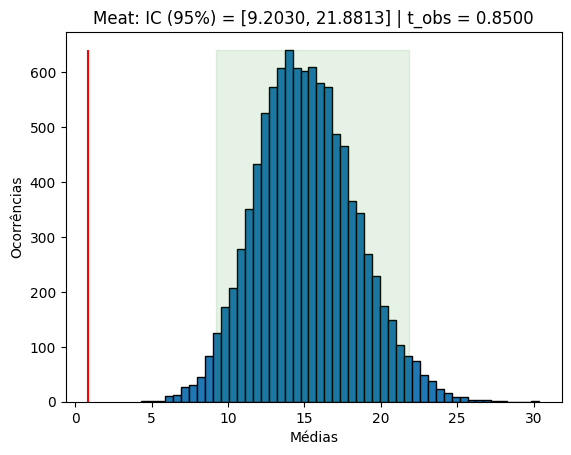

Mushrooms      : IC (95%) = [ 0.4000, 47.9500] | t_obs = 1.3500


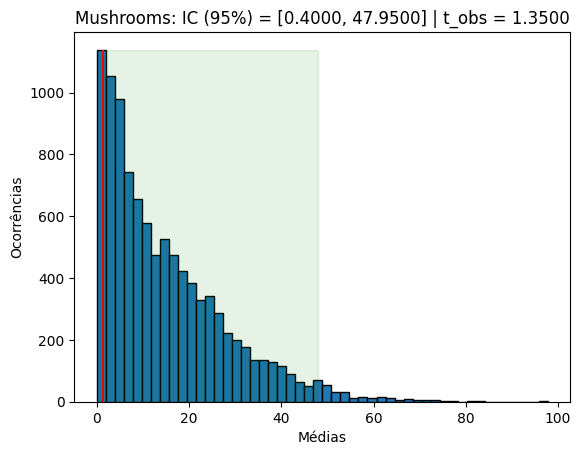

Nuts           : IC (95%) = [ 7.1824, 24.9235] | t_obs = 8.0294


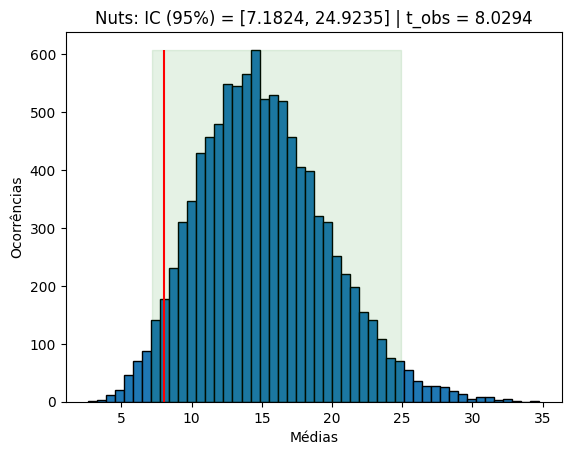

Oils and sauces: IC (95%) = [ 6.8436, 25.1130] | t_obs = 1.0188


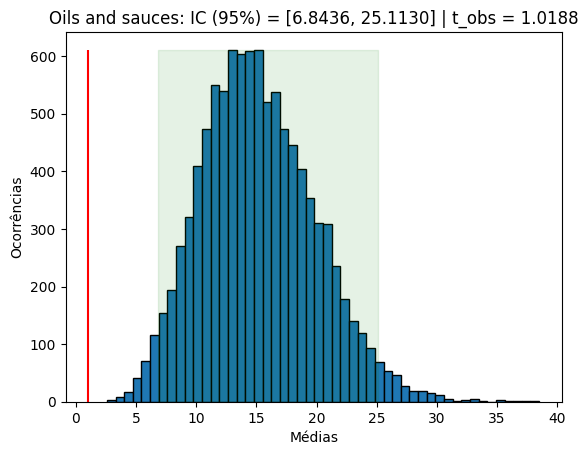

Other          : IC (95%) = [ 7.0684, 25.1564] | t_obs = 18.5875


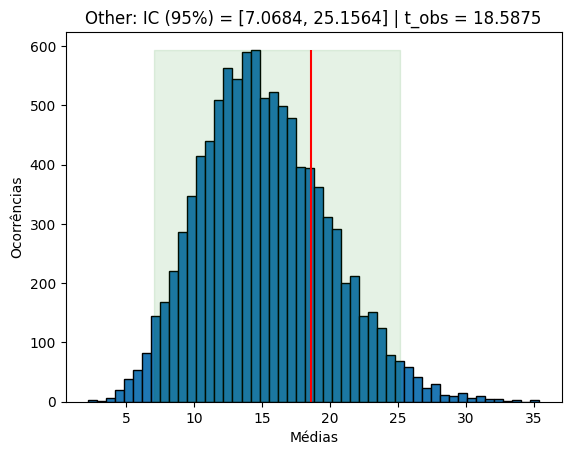

Seafood        : IC (95%) = [ 2.5595, 34.2605] | t_obs = 0.7000


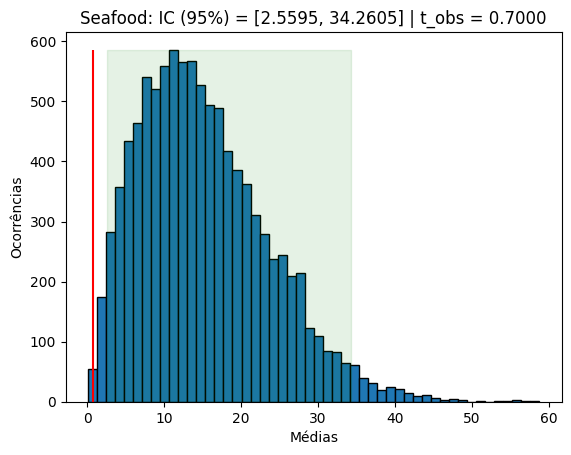

Soups          : IC (95%) = [ 2.5400, 34.7400] | t_obs = 2.9800


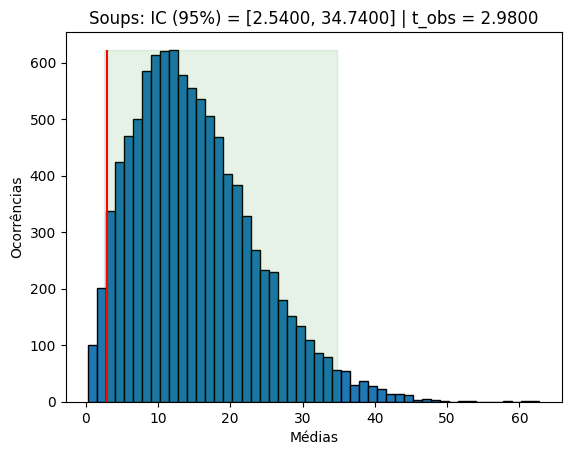

Spices         : IC (95%) = [ 8.4417, 23.1210] | t_obs = 5.0667


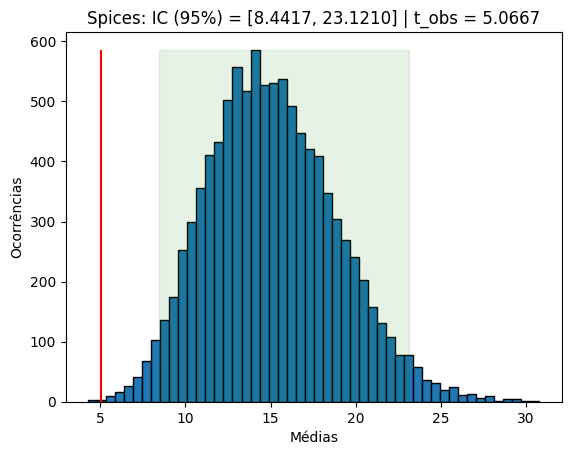

Sweets         : IC (95%) = [ 9.8595, 20.9382] | t_obs = 38.5524


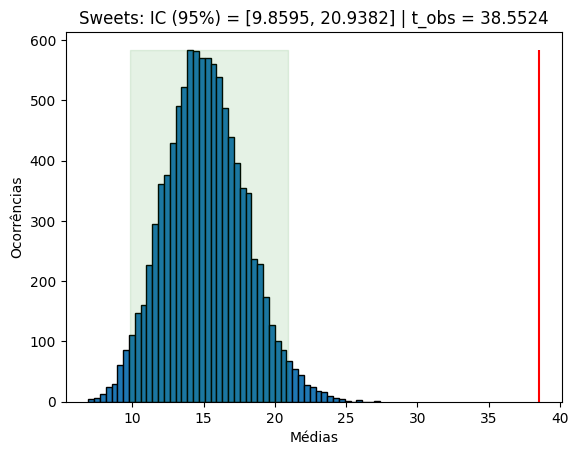

Vegetables     : IC (95%) = [10.6654, 20.0710] | t_obs = 3.4991


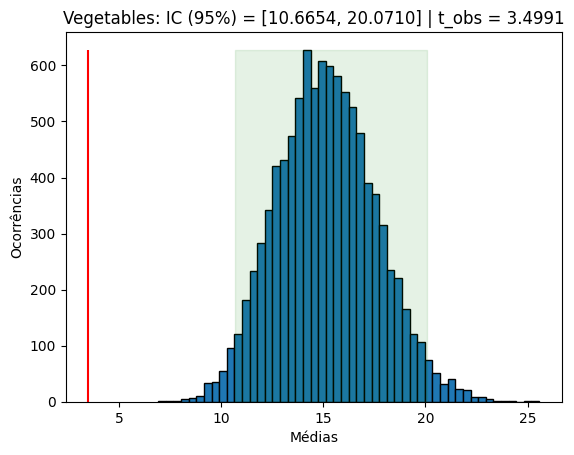

In [88]:
# Realizando ICs separadas para cada categoria

medias_originais = (df
    [['category', 'glycemic_load']]
    .groupby('category')
    .mean()
    ['glycemic_load'])

graficos = []

for i, categoria in enumerate(categorias):
    confianca_inf = np.percentile(medias[:, i], 2.5)
    confianca_sup = np.percentile(medias[:, i], 97.5)
    print(f'{categoria:15}: IC (95%) = [{confianca_inf:7.4f}, {confianca_sup:7.4f}] | t_obs = {medias_originais[categoria]:.4f}')
    height, *_ = plt.hist(medias[:, i], bins=50, edgecolor='k')
    plt.xlabel(f'Médias')
    plt.ylabel('Ocorrências')
    plt.title(f'{categoria}: IC (95%) = [{confianca_inf:.4f}, {confianca_sup:.4f}] | t_obs = {medias_originais[categoria]:.4f}')
    plt.vlines(medias_originais[categoria], 0, height.max(), color='red')
    plt.fill_betweenx([0, height.max()], confianca_inf, confianca_sup, color='g', alpha=0.1)
    # plt.text(t_obs+1, 0.10, '$16\%$ dos casos')
    # despine()
    plt.show()

Executamos diversos intervalos de confiança, e podemos notar que, na maioria deles, os valores observados estão fora do intervalo de confiança, o que nos permite rejeitar a hipótese nula de que os valores que observamos são explicados pelo acaso. Isso nos dá mais confiança de que nossa hipótese alternativa está correta, e que alimentos onde a maior parte das calorias vem de carboidratos e gorduras têm GL maior, sendo assim alimentos que devem ser evitados por pessoas com diabetes.

- Os casos em que os valores estão dentro do IC podem ser facilmente explicados pelo número de elementos: categorias como Sopas, Frutos do mar e Cogumelos são muito pequenas (5, 5 e 2 alimentos, respectivamente). Isso aumenta a variabilidade das médias, alargando os Intervalos de Confiança para cobrir uma faixa de valores maior.

## Modelos de regressão

Além das análises exploratórias que fizemos dos dados, o nosso teste de hipótese nos confirmou que de fato há uma correlação entre a composição em macronutrientes do alimento (em especial carboidratos e gorduras) e o GL dele. Com base nesses indícios, podemos treinar um modelo de regressão para prever o valor do GL de um alimento a partir de suas informações nutricionais.

Inicialmente, tentamos duas abordagens: uma regressão múltipla com regularização L2 e uma regressão baseada em vizinhos mais próximos. Utilizamos também a validação cruzada para evitar um overfitting dos nossos dados, na busca de encontrar um modelo que generalize melhor. Abaixo estão os resultados que encontramos, utilizando a biblioteca SciKit Learn.

In [9]:
# Definições base para testar modelos
from sklearn.linear_model import RidgeCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold

In [42]:
# Testando modelos para prever o GL (glycemic_load)
X_gl = df[['real_calories', 'carbs_kcal_perc', 'carbohydrates', 'protein', 'fats']]
y_gl = df[['glycemic_load']]
skf_gl = KFold(n_splits=5)

X_train, X_test, y_gl_train, y_gl_test = train_test_split(X_gl, y_gl, test_size=0.20)

# Regressão Múltipla com Regularização L2, utilizando real_calories
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=skf_gl).fit(X_train, y_gl_train)
print('Regressão Múltipla')
print(f'Parâmetros: {ridge.coef_}')
print(f'Alpha da regularização: {ridge.alpha_}')
print(f'R2 da Regressão Polinomial: {ridge.score(X_test, y_gl_test)}\n')

# Regressão KNN, utilizando real_calories
print('Regressão KNN, com K=5')
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_gl_train)
print(f'R2 do KNN: {knn.score(X_test, y_gl_test)}')

Regressão Múltipla
Parâmetros: [[ 0.00828793 -4.7460901   0.60391179 -0.31478403 -0.12758034]]
Alpha da regularização: 1.0
R2 da Regressão Polinomial: 0.7821931792452034

Regressão KNN, com K=5
R2 do KNN: 0.7389280730797291


Olhando para o valor do R2 de cada um dos modelos, avaliado nos dados de teste, vemos que a regressão múltipla se saiu melhor que o KNN, e por isso escolhemos esse modelo para prosseguir.

Para desenvolvermos nosso modelo final, utilizamos a biblioteca statsmodels, pois ela nos apresenta resultados mais detalhados, que facilitam a criação de um modelo mais polido.

In [50]:
import statsmodels.api as sm

X_gl = df[['real_calories', 'carbs_kcal_perc', 'carbohydrates', 'protein', 'fats']]
y_gl = df[['glycemic_load']]

X_c = sm.add_constant(X_gl)
X_c_train, X_c_test, y_c_gi_train, y_c_gi_test = train_test_split(X_c, y_gl, test_size=0.20)

model2 = sm.OLS(y_c_gi_train, X_c_train)
resultado = model2.fit()
resultado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          glycemic_load   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     382.3
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          2.80e-144
Time:                        18:20:34   Log-Likelihood:                -1681.0
No. Observations:                 462   AIC:                             3372.
Df Residuals:                     457   BIC:                             3393.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.0464      1.747      2.316      0.021       0.613       7.480
real_calories       0.0034      0.004      0.893      0.372      -0.004       0.011
carbs_kcal_perc    -7.2434      2.418     -2.996      0.003     -11.995      -2.492
carbohydrates       0.6491      0.030     21.956      0.000       0.591       0.707
protein            -0.4445      0.068     -6.554      0.000      -0.578      -0.311
fats               -0.0906      0.023     -3.860      0.000      -0.137      -0.044
==============================================================================
Omnibus:                       71.613   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              834.360
Skew:                          -0.029   Prob(JB):                    6.62e-182
Kurtosis:                       9.583   Cond. No.                     2.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.58e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

O relatório de regressão acima, gerado com a biblioteca statsmodels, mostra os intervalos de confiança para os coeficientes da nossa regressão. Os intervalos que contém o valor 0 correspondem a variáveis que podem possivelmente ser eliminadas do nosso modelo, para reduzir a variância e encontrar um modelo que generalize melhor.